In [2]:
from pydub import AudioSegment
from sys import path


def convert_wav_trim(path: str, t1=None, t2=None, output_path=path[0] + "\\files\\output\\wav_"):
    file = path.split("\\")[-1]
    file_name, file_format  = file.split(".")
    if file_format == "mp3":
        sound = AudioSegment.from_mp3(path)
    elif file_format == "ogg":
        sound = AudioSegment.from_ogg(path)
    elif file_format == "wav":
        from scipy.io import wavfile
        sample_rate, sound = wavfile.read(path)
    
    if t1 != None :
        t1_mil = t1 * 1000  # Works in milliseconds
        sound = sound[t1_mil:]
        output_path += f"from_{t1}_"
    if t2 != None :
        t2_mil = t2 * 1000
        sound = sound[:t2_mil]
        output_path += f"to_{t2}_"


    write_path = output_path + file_name + ".wav"
    sound.export(write_path, format="wav")

    return write_path,sound


In [7]:
# files
src = path[0] + "\\files\\input\\"
dst = path[0] + "\\files\\output\\"

# file = src + "voice2.ogg"
file = src + "Souvenir.mp3"

print(file)

c:\+Code\University\Signal\Audio FFT\files\input\Souvenir.mp3


In [5]:
import playsound
import numpy as np
def convert_to_wav(dir ,sample_rate,type):
    wavfile.write(dir, sample_rate, type)
def play(dir):
    playsound.playsound(dir)


In [6]:
from scipy.io import wavfile

wav_path,sound = convert_wav_trim(file,t1=5,t2=15)
sample_rate, data = wavfile.read(wav_path)
play(wav_path)


(0.0, 15.0)

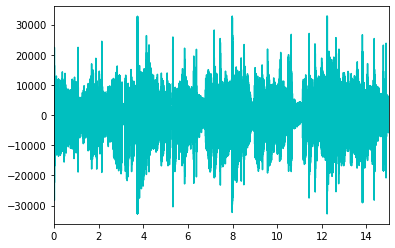

In [8]:
import matplotlib.pyplot as plt
import numpy as np

signal = data[:,1]

length = data.shape[0] / sample_rate
sample_dens = np.linspace(0, length, data.shape[0])

plt.plot(sample_dens, signal, color="c")
plt.xlim(0, length)


c:\+Code\University\env_ai\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


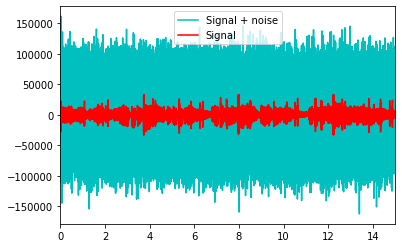

In [19]:
max_signal = max(max(signal),abs(min(signal)))
normal_signal = signal / max_signal
normal_signal = signal 
noise = max_signal * np.random.randn(signal.shape[0]) 
# print(normal_noise)
normal_noise = noise
signal_noisy = normal_signal + normal_noise
# signal_noisy = normal_signal 


plt.plot(sample_dens, signal_noisy, color="c")
plt.plot(sample_dens, normal_signal, color="r")
plt.xlim(0, length)
plt.legend(["Signal + noise","Signal"])

In [22]:
# raise_volume = signal_noisy * max_signal
# wavfile.write(dst + "noisy.wav", sample_rate, signal.astype(data.dtype))
wavfile.write(dst + "noisy.wav", sample_rate, signal_noisy.astype(data.dtype))
playsound.playsound(dst + "noisy.wav" )


In [70]:
import numpy as np
from scipy.signal import butter, lfilter, freqz, cheby1
import matplotlib.pyplot as plt


def filter(signal, low_cutoff,high_cutoff, sr, order):
    print(sr)

    def butter_lowpass(sr, order=5):
        nyq = .5 * sr
        low = low_cutoff / nyq
        high = high_cutoff / nyq
        # b, a = butter(order, [low,high], btype='band', analog=False)
        b, a = butter(order,10, [low,high], btype='band', analog=False)
        # b, a = cheby1(order, 10, low_cutoff, btype='low', analog=False)
        return b, a

    def butter_lowpass_filter(data, sr, order=5):
        b, a = butter_lowpass( sr, order=order)
        y = lfilter(b, a, data)
        return y

    # # Filter requirements.
    # order = 6
    # sr = sample_rate       # sample rate, Hz
    # cutoff = 1000  # desired cutoff frequency of the filter, Hz
    # signal = signal_noisy
    # before_filter_signal = signal
    # Get the filter coefficients so we can check its frequency response.
    b, a = butter_lowpass(sr, order)

    # Plot the frequency response.
    w, h = freqz(b, a, worN=8000)
    plt.subplot(2, 1, 1)
    plt.plot(0.5*sr*w/np.pi, np.abs(h), 'b')
    plt.plot(low_cutoff, 0.5*np.sqrt(2), 'ko')
    plt.axvline(low_cutoff, color='k')
    plt.xlim(0, 0.5*sr)
    plt.title("Lowpass Filter Frequency Response")
    plt.xlabel('Frequency [Hz]')
    plt.grid()

    # Demonstrate the use of the filter.
    # First make some data to be filtered.
    T = signal.shape[0]/sample_rate         # seconds
    n = int(T * sr)  # total number of samples
    t = np.linspace(0, T, n, endpoint=False)
    # "Noisy" data.  We want to recover the 1.2 Hz signal from this.
    # data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

    # Filter the data, and plot both the original and filtered signals.
    print(signal)
    y = butter_lowpass_filter(signal, sr, order)

    plt.subplot(2, 1, 2)
    plt.plot(t, signal, 'b-', label='data')
    plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
    plt.xlabel('Time [sec]')
    plt.grid()
    plt.legend()

    plt.subplots_adjust(hspace=0.35)
    plt.show()

    return y



44100
[386 520 663 ... 768 778 727]


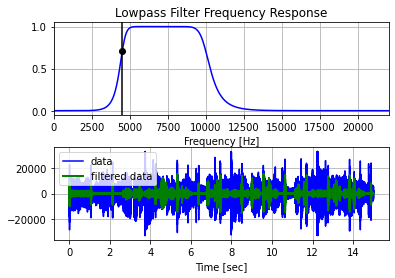

In [101]:
# # Filter requirements.
# order = 6
# fs = sample_rate       # sample rate, Hz
# cutoff = 1000  # desired cutoff frequency of the filter, Hz
# before_filter_signal = signal_noisy
firstFilter = filter(signal, low_cutoff=4500,
                     high_cutoff=10000, sr=sample_rate, order=6)
# secFilter = filter(firstFilter, cutoff=10000, sr=sample_rate, order=6)


In [102]:

convert_to_wav(dst+"_convert_file.wav",sample_rate, firstFilter.astype(data.dtype))
play(dst+"_convert_file.wav")

[     1      2      3 ... 330747 330748 330749]


c:\+Code\University\env_ai\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Power')

c:\+Code\University\env_ai\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


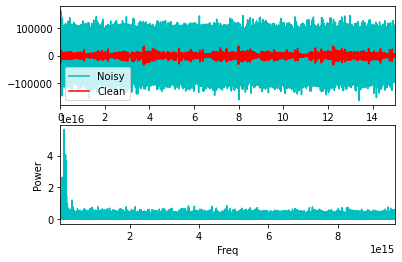

In [55]:
import numpy as np

dt = sample_dens[1]

fhat = np.fft.fft(signal_noisy)
PSD = fhat * np.conj(fhat) 
max_power = max(PSD)
# PSD /= max_power
freq = (1/dt*signal.shape[0]) * np.arange(signal.shape[0])
L = np.arange(1,np.floor(signal.shape[0]/2),dtype='int')
print(L)
fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(sample_dens,signal_noisy,color='c')
plt.plot(sample_dens,normal_signal,color='r')
plt.xlim(sample_dens[0],sample_dens[-1])
plt.legend(["Noisy","Clean"])

plt.sca(axs[1])
plt.plot(freq[L], PSD[L],color='c')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel(xlabel="Freq")
plt.ylabel(ylabel="Power")

c:\+Code\University\env_ai\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\+Code\University\env_ai\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\+Code\University\env_ai\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


c:\+Code\University\env_ai\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


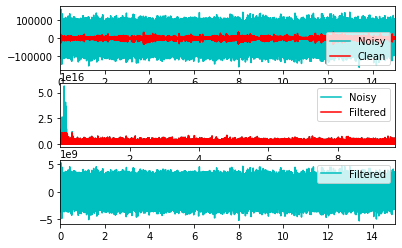

In [63]:
indices = (PSD < (max_power * 0.2))
PSDclean = PSD * indices
new_fhat = indices * fhat * max_signal
ffilt = np.fft.ifft(new_fhat)

fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(sample_dens,signal_noisy,color='c')
plt.plot(sample_dens,normal_signal,color='r')
plt.xlim(sample_dens[0],sample_dens[-1])
plt.legend(["Noisy","Clean"])

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c')
plt.plot(freq[L],PSDclean[L],color='r')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend(["Noisy","Filtered"])

plt.sca(axs[2])
plt.plot(sample_dens,ffilt,color='c')
plt.xlim(sample_dens[0],sample_dens[-1])
plt.legend(["Filtered"])


In [64]:
convert_to_wav(dst + "denoisd.wav", sample_rate, ffilt.astype(data.dtype))
play(dst + "denoisd.wav")

<ipython-input-64-8d321c993a46>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  convert_to_wav(dst + "denoisd.wav", sample_rate, ffilt.astype(data.dtype))
